Задание:
Выбрать набор данных (датасет).
Для лабораторных работ не рекомендуется выбирать датасеты очень большого размера.

Создать "историю о данных" в виде юпитер-ноутбука, с учетом следующих требований:

История должна содержать не менее 5 шагов (где 5 - рекомендуемое количество шагов). 
Каждый шаг содержит график и его текстовую интерпретацию.
На каждом шаге наряду с удачным итоговым графиком рекомендуется в юпитер-ноутбуке оставлять результаты предварительных "неудачных" графиков.
Не рекомендуется повторять виды графиков, желательно создать 5 графиков различных видов.
Выбор графиков должен быть обоснован использованием методологии data-to-viz. 
Рекомендуется учитывать типичные ошибки построения выбранного вида графика по методологии data-to-viz. 
Если методология Вами отвергается, то просьба обосновать Ваше решение по выбору графика.
История должна содержать итоговые выводы. 
В реальных "историях о данных" именно эти выводы представляют собой основную ценность для предприятия.
Сформировать отчет и разместить его в своем репозитории на github.

Этот датасет представляет собой CSV-файл, в котором каждая строка соответствует твиту. Различные столбцы описаны ниже. Каждый диалог включает по крайней мере один запрос от потребителя и по крайней мере один ответ от компании. Идентификаторы пользователей, которые представляют компании, можно определить по полю "inbound".

tweet_id
Уникальный, анонимизированный ID для твита. Используется в столбцах "response_tweet_id" и "in_response_to_tweet_id".

author_id
Уникальный, анонимизированный ID пользователя. Упоминания "@" в датасете были заменены на соответствующие анонимизированные идентификаторы пользователей.

inbound
Определяет, является ли твит "входящим" (inbound) для компании, которая занимается обслуживанием клиентов в Twitter. Эта функция полезна при переорганизации данных для обучения моделей общения.

created_at
Дата и время отправки твита.

text
Содержание твита. Чувствительная информация, такая как номера телефонов и адреса электронной почты, заменена на значения-заменители типа email.

response_tweet_id
ID твитов, которые являются ответами на этот твит, перечислены через запятую.

in_response_to_tweet_id
ID твита, на который был дан ответ в этом твите, если такой ответ был. нужно в юпитер ноутбук проанализировать данный датасет и построить разные графики в нем.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
# Загрузка данных из csv-файла
dataset = pd.read_csv(r'C:\Users\User\Desktop\маг 2сем\гапан\1лаба\twitter.csv')
dataset.head()

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id
0,1,sprintcare,False,Tue Oct 31 22:10:47 +0000 2017,@115712 I understand. I would like to assist y...,2,3.0
1,2,115712,True,Tue Oct 31 22:11:45 +0000 2017,@sprintcare and how do you propose we do that,NaN,1.0
2,3,115712,True,Tue Oct 31 22:08:27 +0000 2017,@sprintcare I have sent several private messag...,1,4.0
3,4,sprintcare,False,Tue Oct 31 21:54:49 +0000 2017,@115712 Please send us a Private Message so th...,3,5.0
4,5,115712,True,Tue Oct 31 21:49:35 +0000 2017,@sprintcare I did.,4,6.0


In [3]:
dataset.shape 

(2811774, 7)

In [4]:
#  выборка запросов
reqs = dataset.loc[dataset["inbound"] == True].sample(n=5000)
reqs.shape

(5000, 7)

In [5]:
# выборка ответов на запросы
resps = dataset.loc[dataset["in_response_to_tweet_id"].isin(reqs["tweet_id"])]
resps.shape

(4632, 7)

In [6]:
resps.head()

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id
540,848,SpotifyCares,False,Tue Oct 31 22:28:16 +0000 2017,@115887 Hmm. Can you try restarting your devic...,849,850.0
658,1198,VirginTrains,False,Tue Oct 31 22:15:38 +0000 2017,@115923 We don't have that information here I'...,NaN,1199.0
1268,1864,Uber_Support,False,Fri Dec 01 06:47:07 +0000 2017,@116127 Here to help! Please DM (direct messag...,1865,1866.0
1379,2041,VirginTrains,False,Tue Oct 31 22:29:57 +0000 2017,@116159 Happy the team could help 😊 ^CB,NaN,2042.0
1412,2101,sprintcare,False,Tue Oct 31 22:38:41 +0000 2017,@116169 Yes dm please.,NaN,2102.0


In [7]:
# отсеем строки без ответов
reqs = reqs[reqs["tweet_id"].isin(resps["in_response_to_tweet_id"])]
reqs.shape

(4192, 7)

In [8]:
reqs.head()

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id
387863,442631,219927,True,Tue Oct 31 18:32:27 +0000 2017,"@GloCare Please DO me, I need your assistance.",442629,NaN
2474656,2644336,746110,True,Fri Nov 17 21:09:21 +0000 2017,Dude at @AlaskaAir just offered anyone in a #3...,2644335,NaN
1819606,1975291,584959,True,Wed Nov 01 14:45:24 +0000 2017,@116062 @116062 put it in my cart and when I h...,1975289,1975292.0
2000589,2157791,633845,True,Thu Nov 09 03:06:24 +0000 2017,@Delta Help! Really need to change an award ti...,2157789,NaN
1868904,2025121,598894,True,Mon Nov 06 13:47:54 +0000 2017,@115858 &amp; a piece of shit software that yo...,2025120,2025122.0


Text(0, 0.5, 'Ответ')

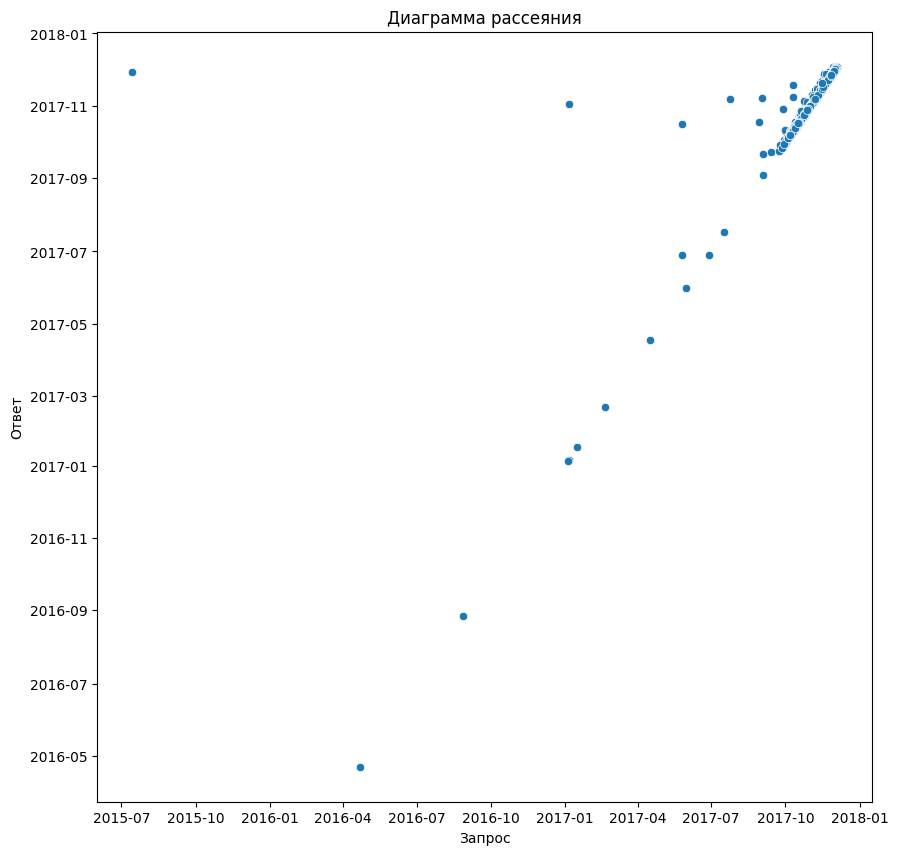

In [16]:
# диаграмма рассеяния
merged_df1 = pd.merge(reqs, resps, left_on='tweet_id', right_on='in_response_to_tweet_id', suffixes=('_req', '_resp'))

# fig, ax = plt.subplots(figsize=(10,10)) 
# sns.scatterplot(ax=ax, x='created_at_req', y='created_at_resp', data=merged_df1)

merged_df1['created_at_req'] = pd.to_datetime(merged_df1['created_at_req'])
merged_df1['created_at_resp'] = pd.to_datetime(merged_df1['created_at_resp'])

fig, ax = plt.subplots(figsize=(10, 10))
sns.scatterplot(ax=ax, x='created_at_req', y='created_at_resp', data=merged_df1)

ax.set_title('Диаграмма рассеяния')
ax.set_xlabel('Запрос')
ax.set_ylabel('Ответ')

Как множно заметить большая часть данных приходится на промежуток времени в конце 2017 года. Ограничим выборку.

In [22]:
reqs = reqs.loc[(pd.to_datetime(reqs["created_at"]) >= '2017-10-01')]
resps = resps.loc[(resps["in_response_to_tweet_id"].isin(reqs["tweet_id"])) & (pd.to_datetime(resps["created_at"]) >= '2017-10-01')]
reqs = reqs[reqs["tweet_id"].isin(resps["in_response_to_tweet_id"])]
reqs.shape, resps.shape
# можно видеть, что большая часть данных сохранилась даже при таком ограничении выборки

((4153, 7), (4592, 7))

C:\Users\User\AppData\Local\Temp\ipykernel_1732\2100163312.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


[Text(17440.0, 0, '2017-10-01'),
 Text(17447.0, 0, '2017-10-08'),
 Text(17454.0, 0, '2017-10-15'),
 Text(17461.0, 0, '2017-10-22'),
 Text(17471.0, 0, '2017-11-01'),
 Text(17478.0, 0, '2017-11-08'),
 Text(17485.0, 0, '2017-11-15'),
 Text(17492.0, 0, '2017-11-22'),
 Text(17501.0, 0, '2017-12-01')]

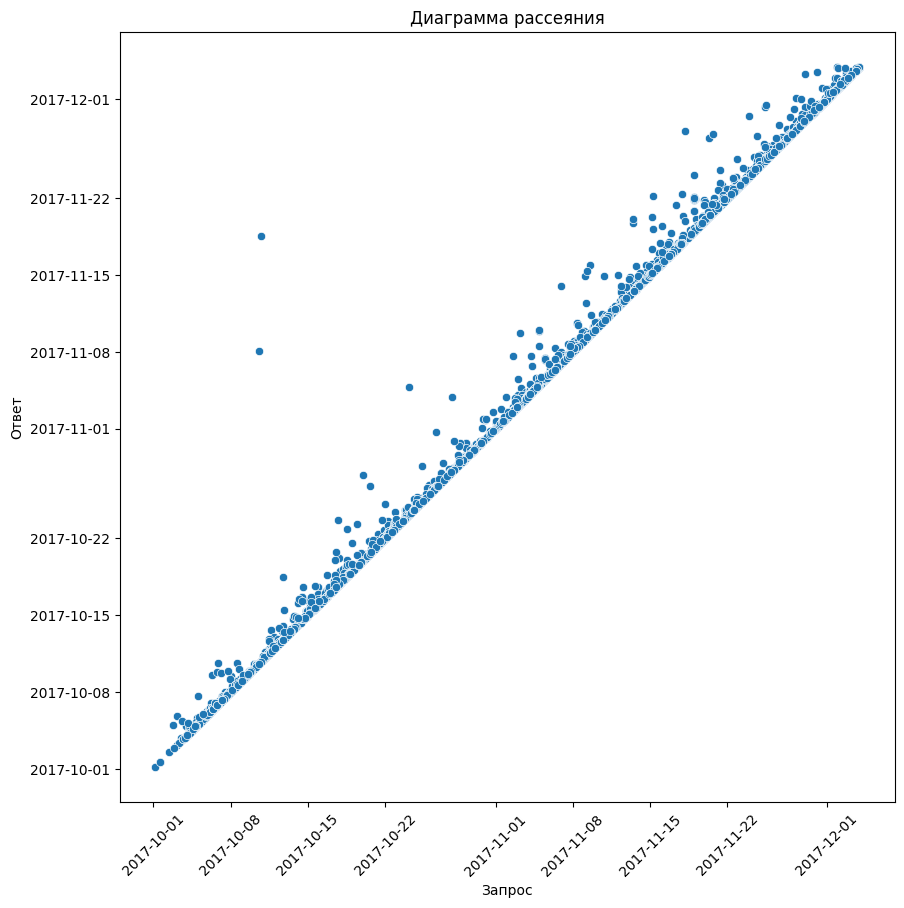

In [24]:
merged_df1 = pd.merge(reqs, resps, left_on='tweet_id', right_on='in_response_to_tweet_id', suffixes=('_req', '_resp'))
merged_df1['created_at_req'] = pd.to_datetime(merged_df1['created_at_req'])
merged_df1['created_at_resp'] = pd.to_datetime(merged_df1['created_at_resp'])

fig, ax = plt.subplots(figsize=(10, 10))
sns.scatterplot(ax=ax, x='created_at_req', y='created_at_resp', data=merged_df1)

ax.set_title('Диаграмма рассеяния')
ax.set_xlabel('Запрос')
ax.set_ylabel('Ответ')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

In [28]:
merged_df1['response_time'] = (merged_df1['created_at_resp'] - merged_df1['created_at_req']).dt.total_seconds()

avg_response_time = merged_df1['response_time'].mean()//60//60

print(f"Совокупное среднее время ответа: {avg_response_time} часа(-ов)")

Совокупное среднее время ответа: 4.0 часа(-ов)


На данной диаграмме рассеяния видно, что большая часть времени ответов тяготеет к отношению X=Y к времени запросов. Чем ближе точка к такому соотношению, тем быстрее пришел ответ на запрос. При этом точки не могут располагаться ниже x=y, т.к. ответ не мог прийти раншье запроса, что и видно по графику. Среднее совокупное время ответов равно примерно 4 часам.

Text(0.5, 1.05, 'Комбинированная диаграмма')

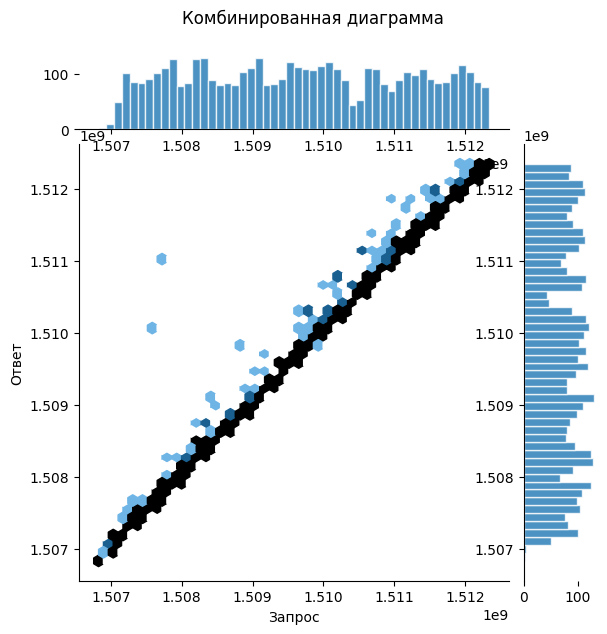

In [122]:
# merged_df1['created_at_req'] = pd.to_datetime(merged_df1['created_at_req']).astype(int) // 10**9
# merged_df1['created_at_resp'] = pd.to_datetime(merged_df1['created_at_resp']).astype(int) // 10**9
g = sns.jointplot(x="created_at_req", y="created_at_resp", data=merged_df1, kind="hex", gridsize=40, vmax=3)


g.ax_marg_x.clear() 
g.ax_marg_x.hist(merged_df1["created_at_req"], alpha=0.8, edgecolor="white", bins=50)


g.ax_marg_y.clear()  
g.ax_marg_y.hist(merged_df1["created_at_resp"], alpha=0.8, edgecolor="white",
                 orientation="horizontal", bins=50)


g.set_axis_labels("Запрос", "Ответ")
g.fig.suptitle("Комбинированная диаграмма", y=1.05)


По гистограммам на краях можно проследить волнообразный, возможно циклический характер распределения количества запросов и ответов во времени. Россмотрим это более подробно.

C:\Users\User\AppData\Local\Temp\ipykernel_1732\2152118459.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  sns.violinplot(x=reqs['created_at'].dt.week)


<Axes: xlabel='created_at'>

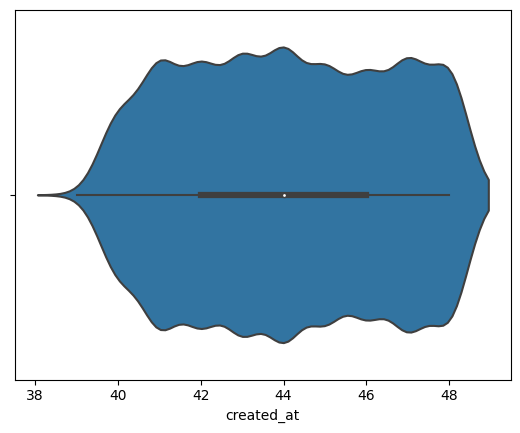

In [150]:
sns.violinplot(x=reqs['created_at'].dt.week)
# запросы - рапределение по неделям

C:\Users\User\AppData\Local\Temp\ipykernel_1732\3242814907.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  sns.violinplot(x=resps['created_at'].dt.week, color = "orange")


<Axes: xlabel='created_at'>

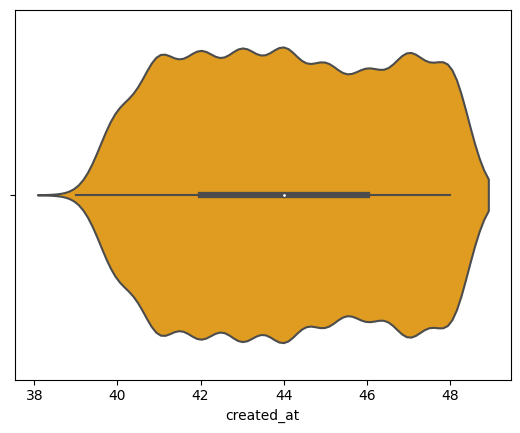

In [143]:
sns.violinplot(x=resps['created_at'].dt.week, color = "orange")
# ответы - рапределение по неделям

<Axes: xlabel='created_at'>

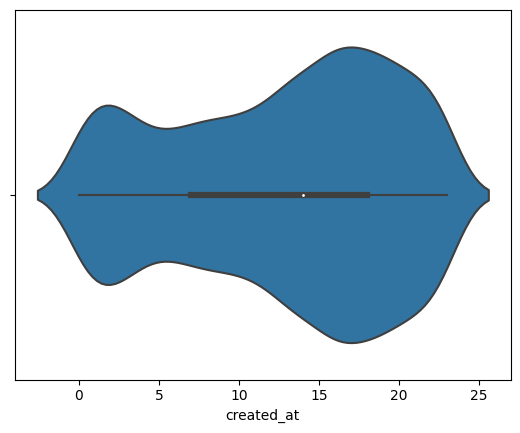

In [138]:
sns.violinplot(x=reqs['created_at'].dt.hour)
# запросы по дням

<Axes: xlabel='created_at'>

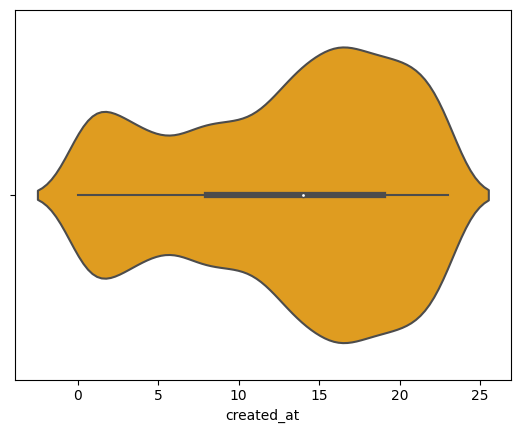

In [149]:
sns.violinplot(x=resps['created_at'].dt.hour, color="orange")
# ответы по дням

C:\Users\User\AppData\Local\Temp\ipykernel_1732\1844844031.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(reqs['created_at'].dt.hour, bins=24)


Text(0, 0.5, 'Число запросов')

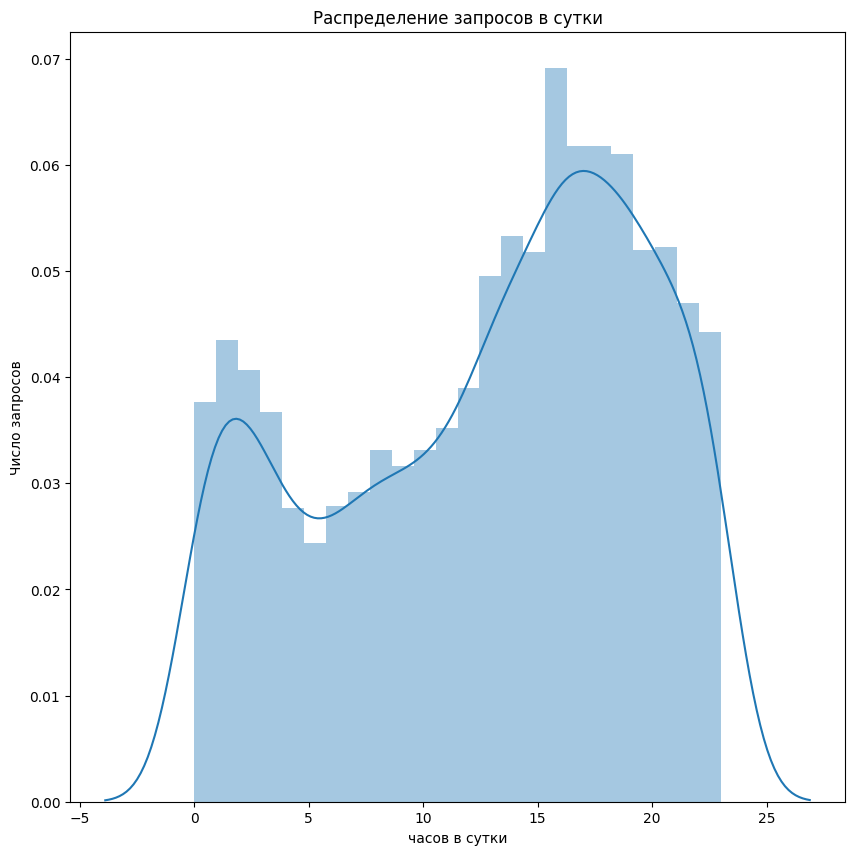

In [162]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.distplot(reqs['created_at'].dt.hour, bins=24)
plt.title("Распределение запросов в сутки")
plt.xlabel("часов в сутки")
plt.ylabel("Число запросов")


C:\Users\User\AppData\Local\Temp\ipykernel_1732\1415242359.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(resps['created_at'].dt.hour, bins=24,color = "orange")


Text(0, 0.5, 'Число запросов')

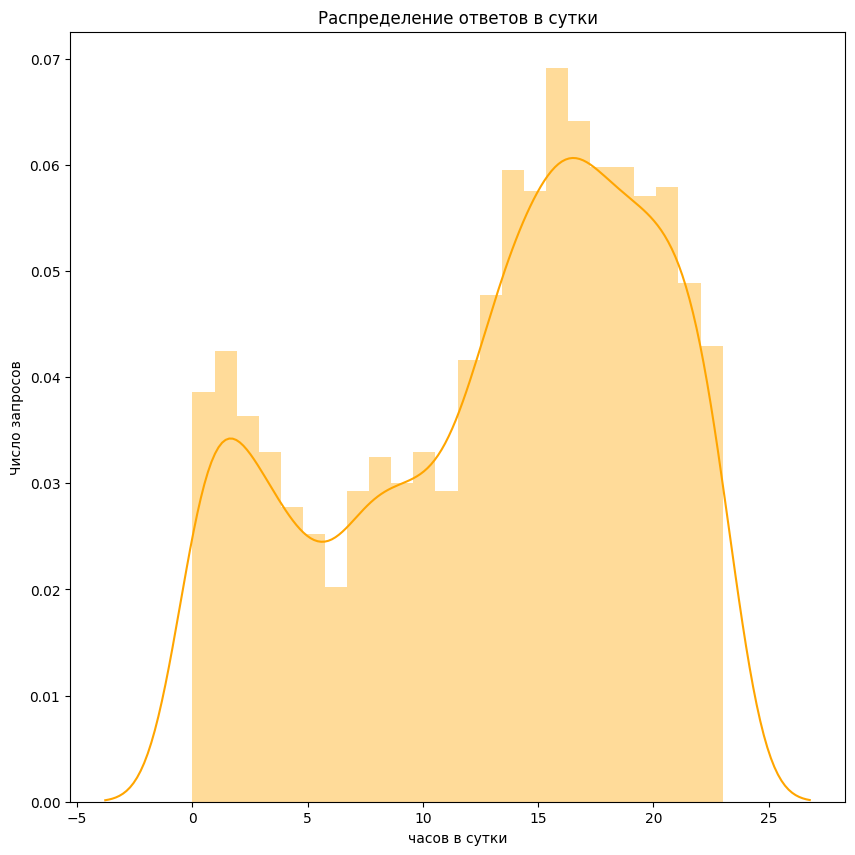

In [164]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.distplot(resps['created_at'].dt.hour, bins=24,color = "orange")
plt.title("Распределение ответов в сутки")
plt.xlabel("часов в сутки")
plt.ylabel("Число запросов")

По данным гистограммам можно проанализировать распределение совокупного количества заявок или ответов по часам в течение дня.

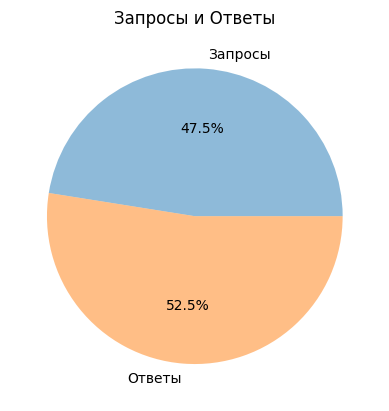

In [183]:
num_reqs = len(reqs)
num_resps = len(resps)

values = [num_reqs, num_resps]

labels = ['Запросы', 'Ответы']

fig, ax = plt.subplots()
ax.pie(values, labels=labels, autopct='%1.1f%%', wedgeprops={'alpha': 0.5})
ax.set_title('Запросы и Ответы')

plt.show()